# Exploratory Data Analysis of NIFTY-50 trends(2000-2021)

## Introduction
<br>

#### This project uses the dataset imported from Kaggle. The dataset is available at https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data. This dataset includes roughly over 50 csv files, with each csv file representing the records of a company in NIFTY-50. This project contrasts and compares two of them, namely:
<br>

#### 1. Tata Consultancy Services Ltd. (TCS.csv)
#### 2. Reliance Industries Ltd. (RELIANCE.csv)

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## 2. Load datasets

In [2]:
# loading the TCS dataset and converting index to datetime type
tcs = pd.read_csv('./datasets/TCS.csv', index_col = 'Date', parse_dates = True)

In [3]:
tcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [4]:
# loading the Reliance dataset and converting index to datetime type
rel = pd.read_csv('./datasets/RELIANCE.csv', index_col = 'Date', parse_dates = True)

In [5]:
rel.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [6]:
print('TCS => Shape :', tcs.shape, ', Size:', tcs.size)
print('Reliance => Shape :', rel.shape, ', Size:', rel.size)

TCS => Shape : (4139, 14) , Size: 57946
Reliance => Shape : (5306, 14) , Size: 74284


### 3. Dataset Description
<br>

* Date (Index): The current date
* Prev Close: The closing price of the previous date.
* Open: The opening price of the date.
* High: The highest price achieved for the date.
* Low: The lowest price achieved for the date.
* Last: The price at which the last stock was traded.
* Close: The closing price of the date.
* VWAP: The volume-weighted average price (VWAP) is a measurement that shows the average price of a security, adjusted for its volume. It is calculated during a specific trading session by taking the total dollar value of trading in the security and dividing it by the volume of trades.
* Volume: The measure of the number of stocks traded on the current date.
* Turnover: The total value of stocks traded on the current date.
* Trades: No. of trades on the current date.
* Deliverable Volume: This is the actual percentage of total trading volume that results in transfer of shares from one account to another’s on the current date.
* %Deliverble: Deliverable percentage is (Deliverable quantity / Traded quantity) on the current date.

The differences in the indices of the two datasets suggest that these two don't have all the dates in common. Since we will be comparing them, we need to drop rows from one of them until all the dates are common in both datasets.

In [7]:
# using merge operation to only get the indices of shared dates
common_dates = pd.merge(tcs, rel, on='Date').index
common_dates

DatetimeIndex(['2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01', '2004-09-02', '2004-09-03',
               '2004-09-06', '2004-09-07',
               ...
               '2021-04-16', '2021-04-19', '2021-04-20', '2021-04-22',
               '2021-04-23', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='Date', length=4139, freq=None)

In [8]:
# dropping unshared dates
tcs = tcs.loc[common_dates, :]
rel = rel.loc[common_dates, :]

In [9]:
# checking if all the indices are common
(tcs.index == rel.index).all()

True

### 4. EDA of TCS and Reliance datasets

In [10]:
# info about the TCS dataset
tcs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4139 entries, 2004-08-25 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              4139 non-null   object 
 1   Series              4139 non-null   object 
 2   Prev Close          4139 non-null   float64
 3   Open                4139 non-null   float64
 4   High                4139 non-null   float64
 5   Low                 4139 non-null   float64
 6   Last                4139 non-null   float64
 7   Close               4139 non-null   float64
 8   VWAP                4139 non-null   float64
 9   Volume              4139 non-null   int64  
 10  Turnover            4139 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  4139 non-null   int64  
 13  %Deliverble         4139 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 485.0+ KB


In [11]:
# info about the Reliance dataset
rel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4139 entries, 2004-08-25 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              4139 non-null   object 
 1   Series              4139 non-null   object 
 2   Prev Close          4139 non-null   float64
 3   Open                4139 non-null   float64
 4   High                4139 non-null   float64
 5   Low                 4139 non-null   float64
 6   Last                4139 non-null   float64
 7   Close               4139 non-null   float64
 8   VWAP                4139 non-null   float64
 9   Volume              4139 non-null   int64  
 10  Turnover            4139 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  4134 non-null   float64
 13  %Deliverble         4134 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 485.0+ KB


The above cell suggests that there are some missing values in the these datasets. We will have them removed.
<br>

*An important thing to note is that if a row is removed from one dataset then the row with that index will have to be removed from the other dataset as well. Thus, we will handling the missing values of these two datasets together.*

#### 4.1. Handling missing values

In [12]:
# columnwise null value count
tcs.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [13]:
# columnwise null value count
rel.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       5
%Deliverble              5
dtype: int64

A relatively small amount i.e. 5 rows from the Reliance dataset have missing values in either 'Deliverable Volume' or '%Deliverble'. We can just remove them without affecting our analysis.

In [14]:
# finding all the dates where 'Deliverable Volume' or '%Deliverble' is missing in Reliance dataset
nan_dates = rel[rel['%Deliverble'].isna() | rel['Deliverable Volume'].isna()].index
nan_dates

DatetimeIndex(['2006-01-18', '2006-01-19', '2006-01-20', '2006-01-23',
               '2006-01-24'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [15]:
# dropping the rows where index is in nan_dates
tcs.drop(nan_dates, inplace=True)
rel.drop(nan_dates, inplace=True)

In [16]:
rel.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1678
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [17]:
tcs.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1678
Deliverable Volume       0
%Deliverble              0
dtype: int64

To handle the considerable amount of missing values in the Trades column, we first need to examine the dates where this value is missing in both the datasets and take action accordingly.

In [18]:
tcs_missing_trades = tcs[tcs['Trades'].isna()].index
rel_missing_trades = rel[tcs['Trades'].isna()].index

In [19]:
tcs_missing_trades[len(tcs_missing_trades)-1] - tcs_missing_trades[0]

Timedelta('2470 days 00:00:00')

In [20]:
(tcs_missing_trades == rel_missing_trades).all()

True

The above cell proves that both the datasets are missing trades value on the same dates.

In [21]:
tcs.drop(tcs_missing_trades, inplace=True)
rel.drop(rel_missing_trades, inplace=True)

In [22]:
print("No. of missing values in TCS dataset:", tcs.isna().sum().sum())
print("No. of missing values in Reliance dataset:", rel.isna().sum().sum())

No. of missing values in TCS dataset: 0
No. of missing values in Reliance dataset: 0


The data has been cleaned.

## 5. Queries for analysis

### 5.1 Compare the simple moving averages for both companies(20 days)

In [23]:
# calculating the simple moving average over 20 days for both companies
tcs_sma_20 = tcs['Trades'].rolling(20, min_periods=1).mean()
rel_sma_20 = rel['Trades'].rolling(20, min_periods=1).mean()

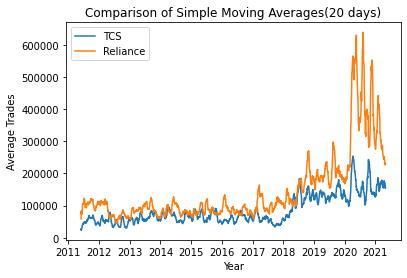

In [24]:
# plotting the simple moving averages for both companies
plt.plot(tcs_sma_20, label="TCS")
plt.plot(rel_sma_20, label="Reliance")
plt.ylabel('Average Trades')
plt.xlabel('Year')
plt.title('Comparison of Simple Moving Averages(20 days)')
plt.legend()
plt.show()

### 5.2 Compare the Exponential Moving Average for both companies

In [25]:
# calculating the exponential moving averages for both companies, with a smoothing factor of 0.1
tcs_ema_20 = tcs['Trades'].ewm(alpha=0.1, adjust=False).mean()
rel_ema_20 = rel['Trades'].ewm(alpha=0.1, adjust=False).mean()

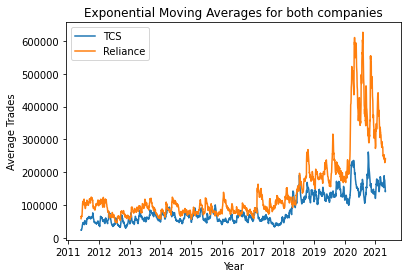

In [26]:
# plotting exponential moving averages for both companies
plt.plot(tcs_ema_20, label="TCS")
plt.plot(rel_ema_20, label="Reliance")
plt.ylabel('Average Trades')
plt.xlabel('Year')
plt.title('Exponential Moving Averages for both companies')
plt.legend()
plt.show()

### 5.3 Calculate and compare the correlation between the opening price and the trades for both companies

In [27]:
# calculating correlation between Open column and Trades column
tcs_open_trades_corr = tcs['Open'].corr(tcs['Trades'])
rel_open_trades_corr = rel['Open'].corr(rel['Trades'])

print("Correlation between TCS's Open and Trades:", '%.3f' % tcs_open_trades_corr)
print("Correlation between Reliance's Open and Trades:", '%.3f' % rel_open_trades_corr)

Correlation between TCS's Open and Trades: 0.190
Correlation between Reliance's Open and Trades: 0.614


The above values state that Reliance's opening price and trades are more strongly correlated to each other than that of TCS. So, for Reliance, opening prices and trades go hand in hand.

### 5.4 Calculate and compare the covariance between opening price and the trades for both companies

In [28]:
# calculating covariance between Open column and Trades column
tcs_open_trades_cov = tcs['Open'].cov(tcs['Trades'])
rel_open_trades_cov = rel['Open'].cov(rel['Trades'])

print("Covariance between TCS's Open and Trades:", '%.3f' % tcs_open_trades_cov)
print("Covariance between Reliance's Open and Trades:", '%.3f' % rel_open_trades_cov)

Covariance between TCS's Open and Trades: 5984711.593
Covariance between Reliance's Open and Trades: 28691816.110


### 5.5 Calculate and compare the correlation between high prices and the volume for both companies

In [29]:
# calculating correlation between Volume and High
tcs_vol_high_corr = tcs['Volume'].corr(tcs['High'])
rel_vol_high_corr = rel['Volume'].corr(rel['High'])

print("Correlation between TCS's Volume and High:", '%.3f' % tcs_vol_high_corr)
print("Correlation between Reliance's Volume and High:", '%.3f' % rel_vol_high_corr)

Correlation between TCS's Volume and High: 0.057
Correlation between Reliance's Volume and High: 0.563


### 5.6 Calculate and compare the covariance between high prices and the volume for both companies

In [30]:
# calculating covariance between Volume and High
tcs_vol_high_cov = tcs['Volume'].cov(tcs['High'])
rel_vol_high_cov = rel['Volume'].cov(rel['High'])

print("Covariance between TCS's Volume and High:", '%.3f' % tcs_vol_high_cov)
print("Covariance between Reliance's Volume and High:", '%.3f' % rel_vol_high_cov)

Covariance between TCS's Volume and High: 58559886.815
Covariance between Reliance's Volume and High: 1274098272.434


### 5.7 Based on previous data, roughly calculate the probablity of stock prices increasing on a day for both companies.

In [31]:
# creating a boolean array where True means that price increased and False otherwise
tcs_did_increase = tcs['Close'] > tcs['Open']
rel_did_increase = rel['Close'] > rel['Open']

print("Chances of price increasing on a day for TCS: ", '%.3f' % (tcs_did_increase.sum() / len(tcs_did_increase) * 100), '%', sep="")
print("Chances of price increasing on a day for Reliance: ", '%.3f' % (rel_did_increase.sum() / len(rel_did_increase) * 100), '%', sep="")

Chances of price increasing on a day for TCS: 49.023%
Chances of price increasing on a day for Reliance: 46.743%


This simple method suggests that TCS is about 1.05x more likely to have their stock prices increased at the end of the day when compared to Reliance.

### 5.8 Plot a graph showing the average trades per year for both companies

In [32]:
# grouping the data by year of index and calculating the mean
avg_trades_per_year_tcs = tcs.groupby(tcs.index.year).mean()['Trades']
avg_trades_per_year_rel = rel.groupby(rel.index.year).mean()['Trades']

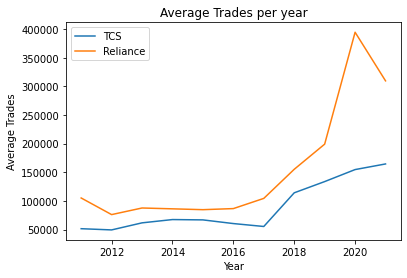

In [33]:
plt.plot(avg_trades_per_year_tcs, label = "TCS")
plt.plot(avg_trades_per_year_rel, label = "Reliance")
plt.xlabel('Year')
plt.ylabel('Average Trades')
plt.title('Average Trades per year')
plt.legend()
plt.show()

### 5.9 Plot a graph showing the highest and lowest trades for each year for both companies

In [34]:
# grouping data by index's year and getting the max and min values from Trades
tcs_max_trades_annual = tcs.groupby(tcs.index.year)['Trades'].max()
rel_max_trades_annual = rel.groupby(rel.index.year)['Trades'].max()
tcs_min_trades_annual = tcs.groupby(tcs.index.year)['Trades'].min()
rel_min_trades_annual = rel.groupby(rel.index.year)['Trades'].min()

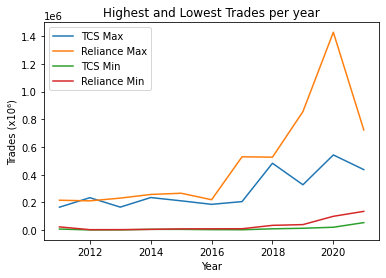

In [35]:
plt.plot(tcs_max_trades_annual, label = "TCS Max")
plt.plot(rel_max_trades_annual, label = "Reliance Max")
plt.plot(tcs_min_trades_annual, label = "TCS Min")
plt.plot(rel_min_trades_annual, label = "Reliance Min")
plt.xlabel('Year')
plt.ylabel('Trades (x10⁶)')
plt.title('Highest and Lowest Trades per year')
plt.legend()
plt.show()

In [36]:
# tcs.groupby(tcs.index.weekday)['Volume'].sum().plot.pie()

In [37]:
# tcs['Prev Close'].plot.box()